      Iteration 0  Iteration 100  Iteration 200  Iteration 300  Iteration 399
x                                                                            
0.00         0.00       0.000000       0.000000       0.000000       0.000000
0.05         0.85       0.143384       0.094716       0.065266       0.045242
0.10         1.00       0.281956       0.187053       0.128923       0.089369
0.15         1.00       0.411304       0.274704       0.189403       0.131296
0.20         1.00       0.527745       0.355490       0.245216       0.169989
0.25         1.00       0.628526       0.427427       0.294987       0.204497
0.30         1.00       0.711855       0.488768       0.337492       0.233970
0.35         1.00       0.776803       0.538043       0.371686       0.257681
0.40         1.00       0.823071       0.574085       0.396728       0.275047
0.45         1.00       0.850720       0.596050       0.412003       0.285641
0.50         1.00       0.859911       0.603429       0.417137  

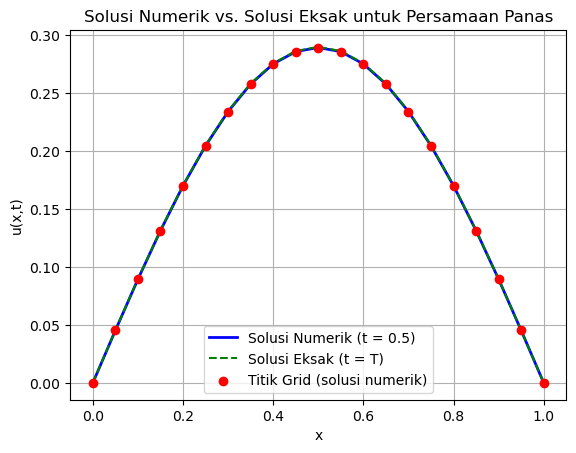

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameter problem
K = 0.3  # Koefisien difusi
L = 1.0  # Panjang domain
T = 0.5  # Waktu simulasi

# Parameter grid
dt = 0.125e-2  # Delta t
dx = 0.05      # Delta x

# Kondisi stabilitas
lambda_ = K * dt / (dx**2)  # Ini adalah lambda, pengali pada persamaan diskrit

# Set up grid
Nx = int(L / dx) + 1  # jumlah titik di grid ruang
Nt = int(T / dt)      # jumlah langkah waktu
x = np.linspace(0, L, Nx)  # Membuat grid di ruang x
u = np.ones(Nx)       # Kondisi awal u(x,0) = 1 di semua grid
u[0] = u[-1] = 0      # Syarat batas u(0,t) = u(L,t) = 0

# Prepare a dictionary to store the values of u at selected iterations
iterations_to_record = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]
results = {f"Iteration {n}": [] for n in iterations_to_record}
results["x"] = x

# Time-stepping loop
for n in range(Nt):  # Loop untuk setiap langkah waktu (iterasi t)
    u_new = np.copy(u)  # Menyimpan nilai u sebelumnya (pada langkah waktu sebelumnya)

    # Ini adalah SOLUSI NUMERIK yang kita hitung di setiap iterasi:
    for i in range(1, Nx-1):  # Menghitung nilai u baru di grid ruang, kecuali pada batas
        u_new[i] = u[i] + lambda_ * (u[i+1] - 2*u[i] + u[i-1])
    
    u = u_new  # Update u untuk langkah waktu berikutnya
    
    # Save results at selected iterations
    if n in iterations_to_record:
        results[f"Iteration {n}"] = u.copy()

# Create DataFrame to present the results in tabular form
df_results = pd.DataFrame(results)
df_results.set_index('x', inplace=True)  # Use x as the index for the grid points
print(df_results)

# Define exact solution using Fourier series (truncated)
def exact_solution(x, t, K, L, terms=100):
    u_exact = np.zeros_like(x)
    for n in range(1, terms + 1, 2):  # Menggunakan n ganjil untuk simetri
        B_n = 4 / (n * np.pi)
        u_exact += B_n * np.sin(n * np.pi * x / L) * np.exp(-K * (n * np.pi / L)**2 * t)
    return u_exact

# Calculate exact solution at final time T
u_exact_T = exact_solution(x, T, K, L)

# Plot the final numerical solution and exact solution
plt.plot(x, u, label=f'Solusi Numerik (t = {T})', color='blue', lw=2)
plt.plot(x, u_exact_T, label='Solusi Eksak (t = T)', color='green', linestyle='--')

# Menambahkan grid points dan label
plt.scatter(x, u, color='red', zorder=5, label='Titik Grid (solusi numerik)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Solusi Numerik vs. Solusi Eksak untuk Persamaan Panas')
plt.legend()
plt.grid(True)
plt.show()


Grid ini penting dalam pemodelan numerik dari persamaan diferensial parsial (PDE), seperti persamaan panas (heat equation) atau persamaan gelombang. Grid membantu memecah ruang kontinu menjadi diskret, sehingga metode numerik seperti metode beda hingga (finite difference method) dapat diterapkan. Setiap titik pada grid adalah tempat di mana perhitungan dilakukan untuk setiap langkah waktu, sehingga solusi numerik dapat diperkirakan secara bertahap.

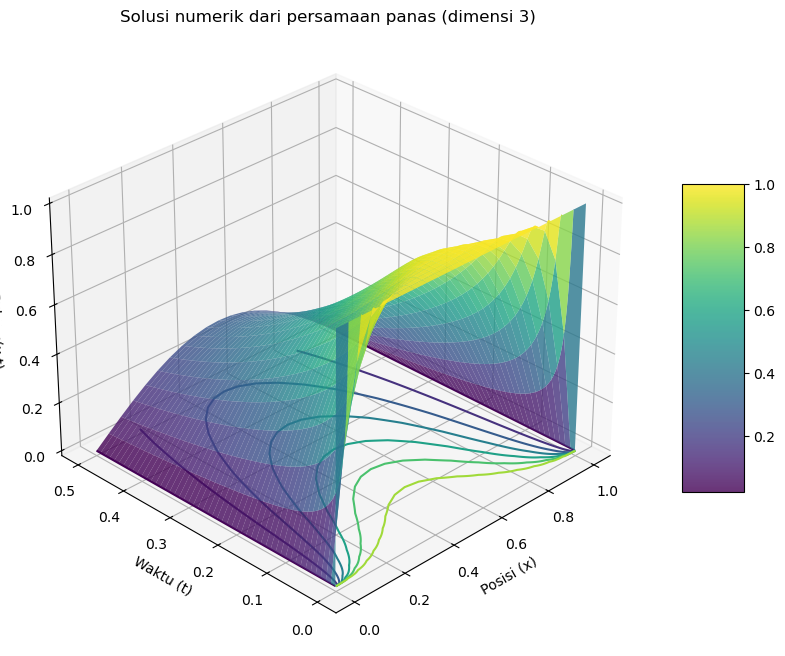

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter problem
K = 0.3  # Koefisien difusi
L = 1.0  # Panjang domain
T = 0.5  # Waktu simulasi

# Parameter grid
dt = 0.125e-2  # Delta x
dx = 0.05      # Delta t

# Compute lambda
lambda_ = K * dt / (dx**2)

# Set up grid
Nx = int(L / dx) + 1  # Number of spatial points
Nt = int(T / dt)      # Number of time steps
x = np.linspace(0, L, Nx)  # Grid di ruang x
t = np.linspace(0, T, Nt)  # Grid di waktu t

# Matrix to store solution for all time steps
U = np.ones((Nt, Nx))  # U[n, i] menyimpan solusi u di waktu n dan posisi i
U[:, 0] = U[:, -1] = 0  # Syarat batas u(0,t) = u(L,t) = 0

# Set initial condition
U[0, :] = 1  # u(x, 0) = 1 di semua grid x

# Time-stepping loop
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        U[n+1, i] = U[n, i] + lambda_ * (U[n, i+1] - 2*U[n, i] + U[n, i-1])

# Membuat plot 3D
X, T = np.meshgrid(x, t)  # Membuat grid 2D untuk plot

fig = plt.figure(figsize=(12, 8))  # Memperbesar ukuran grafik
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan dengan transparansi
surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='none', alpha=0.8)

# Tambahkan garis kontur untuk memperjelas
ax.contour(X, T, U, zdir='z', offset=0, cmap='viridis')

# Perbaiki perspektif
ax.view_init(elev=30, azim=225)

# Tambahkan color bar untuk skala
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Label axis
ax.set_xlabel('Posisi (x)')
ax.set_ylabel('Waktu (t)')
ax.set_zlabel('Suhu u(x,t)')
ax.set_title('Solusi numerik dari persamaan panas (dimensi 3)')

plt.show()
